## Carregando os dados de reserva de hotel dos clientes

In [52]:
import pandas as pd

url_hotel = "https://raw.githubusercontent.com/alura-cursos/selecao-de-features/main/dados/hotel.csv"
df_hotel = pd.read_csv(url_hotel)
df_hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1


In [53]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

Existem valores nulos?

In [54]:
count_null_values = df_hotel.isnull().sum().sum()
print(f"Número de valores nulos: {count_null_values}")

Número de valores nulos: 0


A variável alvo está desbalanceada?

In [55]:
df_hotel["booking_status"].value_counts(normalize=True)

booking_status
0    0.5
1    0.5
Name: proportion, dtype: float64

## Treinamento base

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5122
           1       0.93      0.91      0.92      5122

    accuracy                           0.92     10244
   macro avg       0.92      0.92      0.92     10244
weighted avg       0.92      0.92      0.92     10244



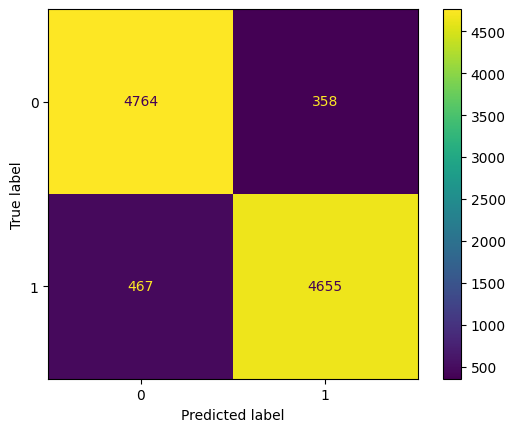

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

SEED = 0

x = df_hotel.drop(columns=["booking_status"])
y = df_hotel["booking_status"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=SEED)

random_forest = RandomForestClassifier(random_state=SEED)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Análise de features

In [57]:
import plotly.express as px

violin_arrival_month = px.violin(df_hotel, x="booking_status", y="arrival_month", box=True)
violin_arrival_month.show()

### Análise dos Gráficos Violino: Mês de Chegada x Status da Reserva

Os gráficos violino apresentados mostram a distribuição do `mês de chegada` (eixo y) em relação ao `status da reserva` (eixo x), onde 0 indica cancelamento e 1 indica que a reserva foi concretizada.

**Observações:**

* **Distribuição Similar:** A forma geral da distribuição dos `meses de chegada` é bastante similar entre os dois `status de reserva`. Isso sugere que o `mês de chegada`, por si só, não é um fator determinante para o cancelamento ou confirmação da reserva.
* **Meses de Pico:** Ambos os gráficos mostram picos de densidade no mês de outubro (mês 10), indicando que este é o mês mais popular para reservas, independentemente do status final.
* **Variação Ligeiramente Maior em Reservas Canceladas:** A distribuição dos `meses de chegada` para reservas canceladas (0) apresenta uma ligeira variação maior, com uma densidade um pouco mais espalhada pelos meses do ano. Isso poderia indicar que os cancelamentos são um pouco mais distribuídos ao longo do ano em comparação com as reservas confirmadas.
* **Mediana Semelhante:** A mediana do `mês de chegada` é praticamente a mesma para ambos os grupos, em torno de agosto (mês 8).

**Conclusões:**

Em geral, o `mês de chegada` parece não ser um fator crucial na diferenciação entre reservas canceladas e confirmadas. As distribuições são muito semelhantes, com picos de densidade nos mesmos meses e medianas praticamente idênticas. 


In [58]:
violin_lead_time = px.violin(df_hotel, x="booking_status", y="lead_time", box=True)
violin_lead_time.show()

**Observações:**

* **Distribuições Assimétricas:** Ambas as categorias de `booking_status` (0 e 1) apresentam distribuições assimétricas à direita para o `lead_time`. Isso indica que a maioria das reservas, tanto as não concretizadas (0) quanto as concretizadas (1), são feitas com relativamente pouca antecedência.

* **Diferenças entre Categorias:**

    * **Mediana:** A mediana do `lead_time` para reservas não concretizadas (0) é visivelmente menor do que para reservas concretizadas (1). Isso sugere que reservas feitas com maior antecedência tendem a ser concretizadas com mais frequência.
    * **Densidade:** A maior densidade do `lead_time` para reservas não concretizadas (0) está concentrada em valores mais baixos, enquanto para reservas concretizadas (1), há uma densidade mais espalhada, mas ainda com maior concentração em torno da mediana.

* **Outliers:** Existem alguns outliers em ambas as categorias, indicando que há algumas reservas feitas com muita antecedência, independentemente do `booking_status`.

**Possíveis Implicações:**

* **Antecedência e Confirmação:** A análise sugere uma relação entre o tempo de antecedência da reserva e a probabilidade de confirmação. Reservas feitas com maior antecedência parecem ter maior probabilidade de serem confirmadas.
* **Estratégias de Marketing:** Oferecer incentivos para reservas com maior antecedência pode ser uma estratégia eficaz para aumentar a taxa de confirmação.
* **Previsão de Confirmação:** O `lead_time` pode ser uma variável importante para modelos preditivos que visam estimar a probabilidade de confirmação de uma reserva.


## Matriz de correlação

In [59]:
correlation = pd.concat([x_train, y_train], axis=1).corr()
px.imshow(correlation, aspect=2, height=900, width=1440, color_continuous_scale="blues")

## As 10 features mais relevantes para o modelo de Random Forest

In [60]:
features_importances = random_forest.feature_importances_
df_features_importances = pd.DataFrame({"feature": x_train.columns, "importance": features_importances})
df_features_importances

,feature,importance
0,no_of_adults,0.021550
1,no_of_children,0.005802
2,no_of_weekend_nights,0.032901
3,no_of_week_nights,0.046755
4,required_car_parking_space,0.009072
5,lead_time,0.286580
6,arrival_year,0.023673
7,arrival_month,0.083700
8,arrival_date,0.081384
9,repeated_guest,0.003489


In [61]:
df_features_importances10 = df_features_importances.sort_values(by="importance", ascending=False).head(10)
px.bar(df_features_importances10[::-1], y="feature", x="importance", orientation="h", title="Top 10 features mais relevantes")